In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors

from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

import scipy.stats as stat
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_prominences, peak_widths
from scipy.stats import linregress

import itertools

import helperfile as hf


In [2]:
# Block of Code to show FIT Image

# bins, intensities  = hf.CreateData('180NoBRun1.txt')
# bins, intensities =  np.array(bins), np.array(intensities)
# hf.Plots(bins, intensities, "B=0.384 kG, Polarize = 180 deg, Intensity Plot - Full set", 'Bins', 'Intensity [ADU] ', figsize0= 15, figsize1=4)

In [3]:
# STEP 1: Load Data 
xy2 = np.loadtxt('XYR3_90_Dic.txt', dtype=int, delimiter=',')
print(type(xy2))

<class 'numpy.ndarray'>


Data ratio set
Data ratio set
Data ratio set
Data ratio set
Data ratio set
Data ratio set
Data ratio set
Data ratio set
Data ratio set
Data ratio set
Data ratio set


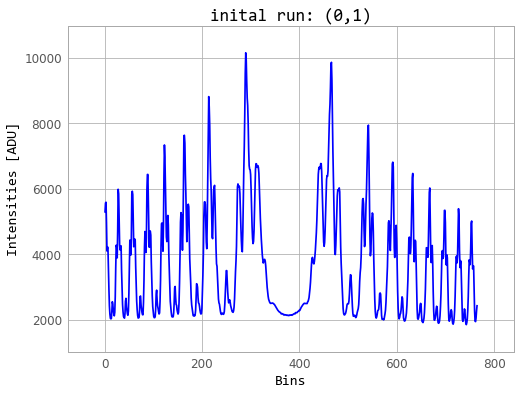

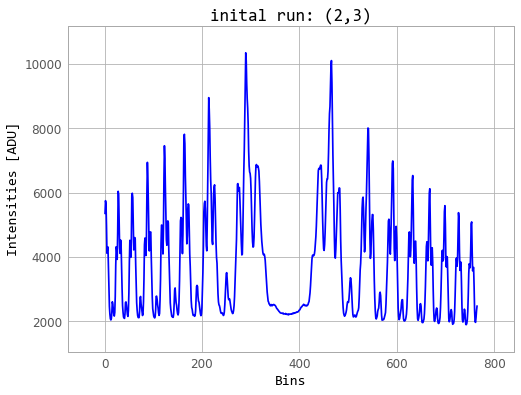

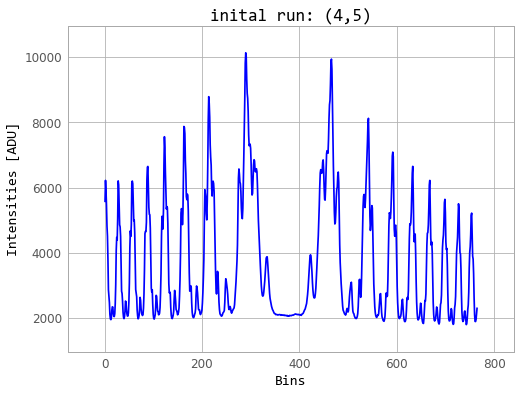

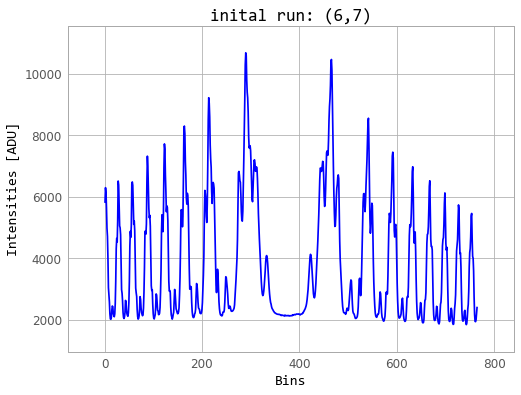

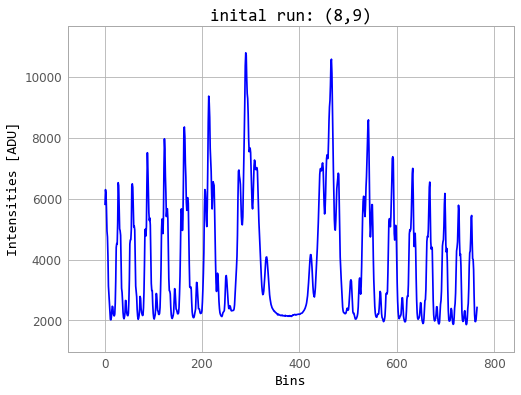

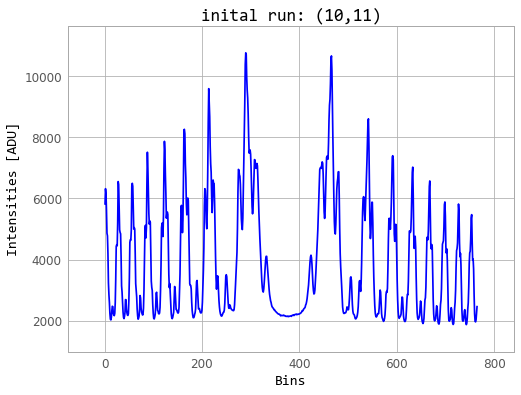

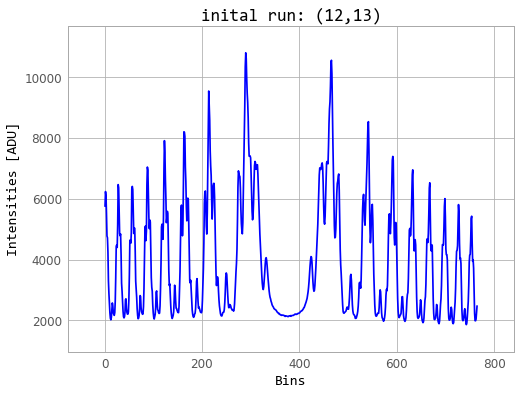

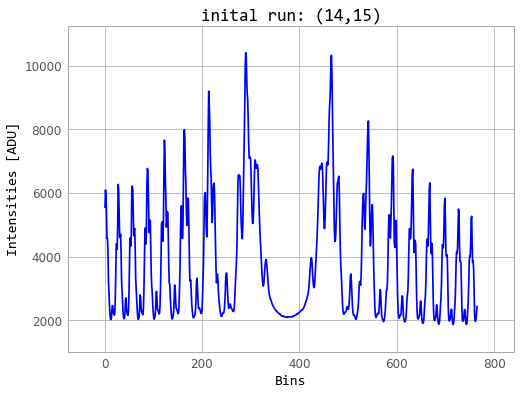

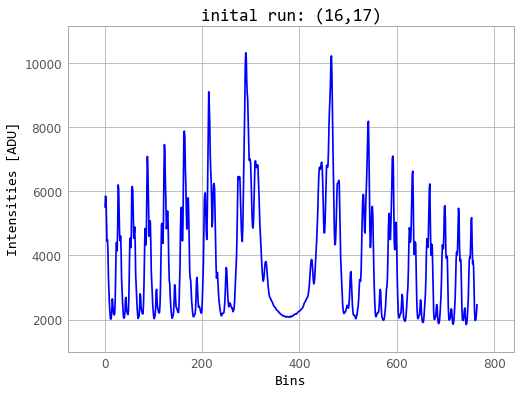

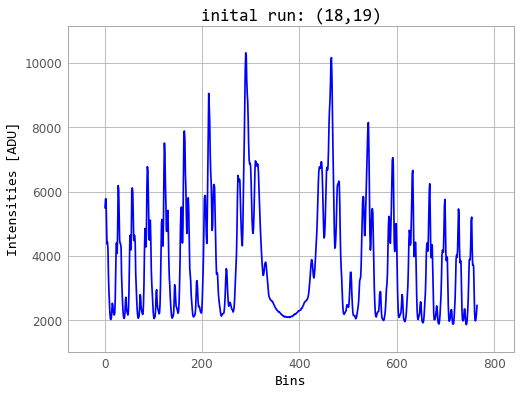

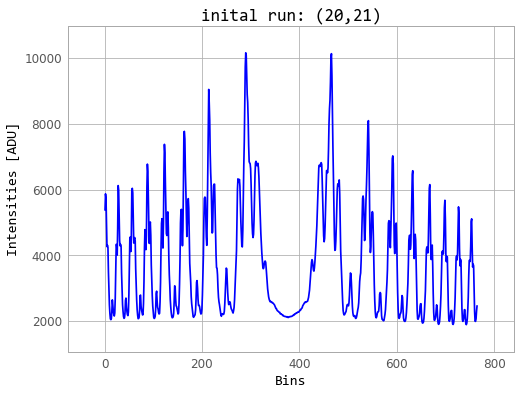

In [19]:
# # STEP 2: Check all graphs  

hf.MakeManyPlots(xy2)

Data ratio set
Data ratio set
Data ratio set
Data ratio set
Data ratio set
Data ratio set
Data ratio set
Data ratio set
Data ratio set
Data ratio set
Data ratio set


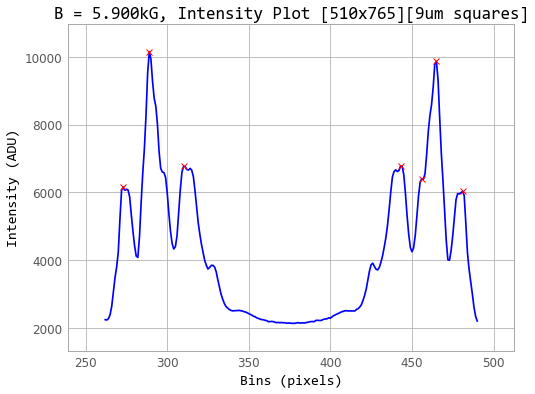

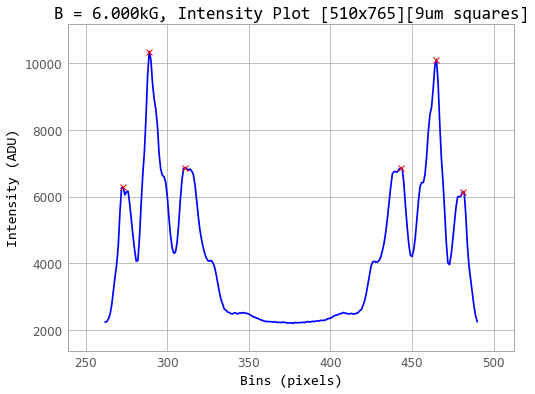

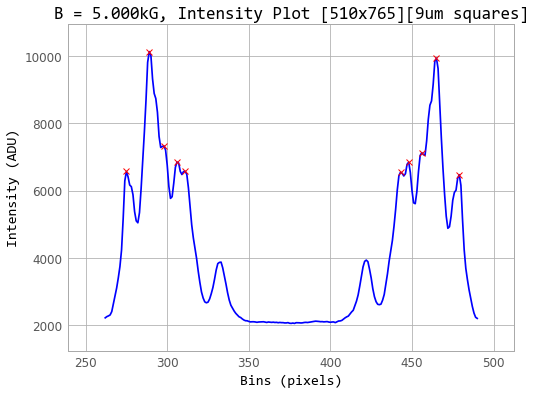

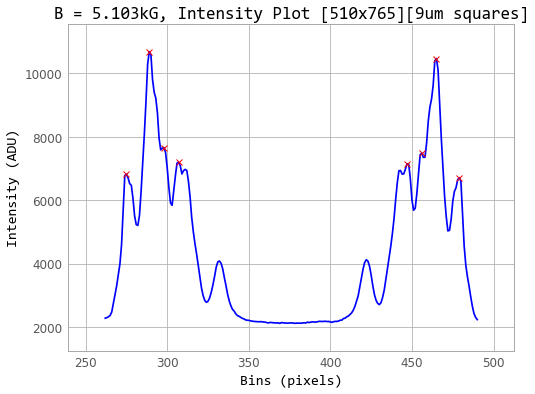

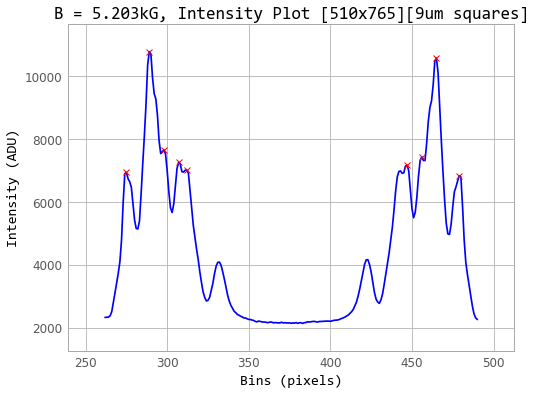

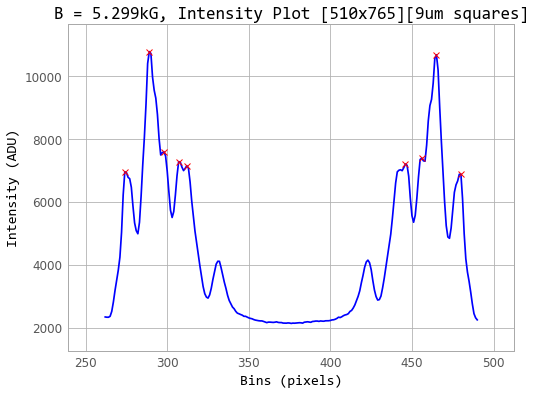

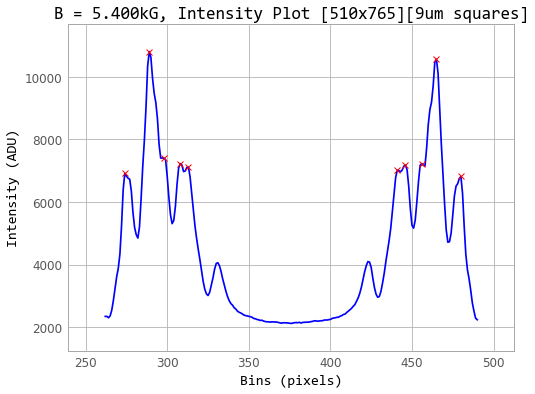

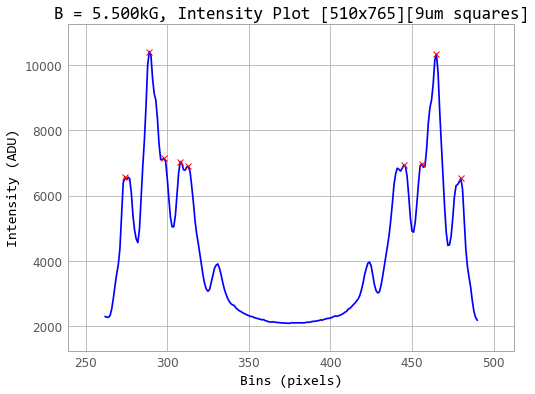

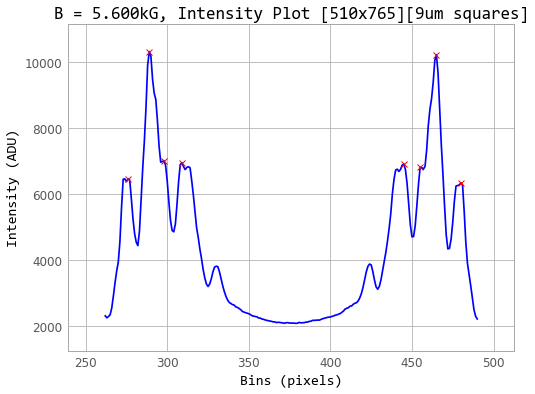

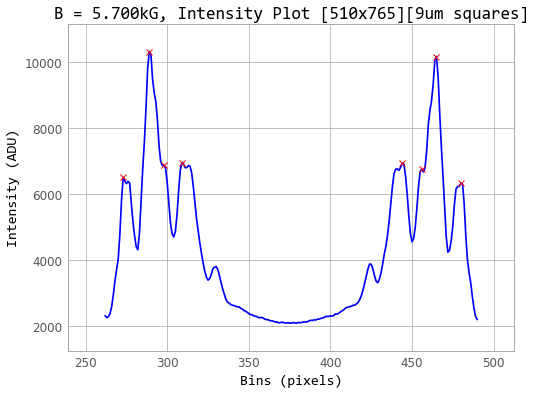

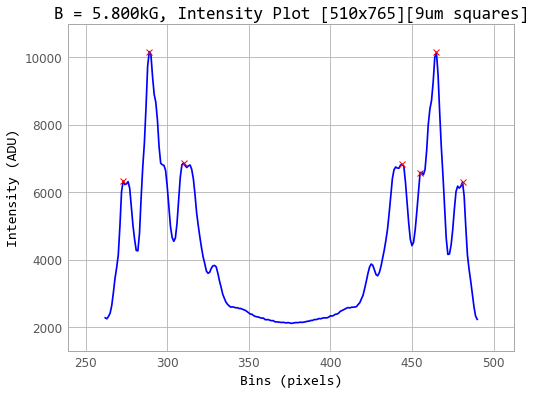

In [18]:
# STEP 5: TRUNCATE TO THE FIRST ORDER
peaks1, x_1, y_1 = hf.LabelPeaks_ShrinkData(xy2[0],xy2[1],262,490,4000)
peaks2, x_2, y_2 = hf.LabelPeaks_ShrinkData(xy2[2],xy2[3],262,490,4300)
peaks3, x_3, y_3 = hf.LabelPeaks_ShrinkData(xy2[4],xy2[5],262,490,4300)
peaks4, x_4, y_4 = hf.LabelPeaks_ShrinkData(xy2[6],xy2[7],262,490,4300)
peaks5, x_5, y_5 = hf.LabelPeaks_ShrinkData(xy2[8],xy2[9],262,490,4300)
peaks6, x_6, y_6 = hf.LabelPeaks_ShrinkData(xy2[10],xy2[11],262,490,4300)
peaks7, x_7, y_7 = hf.LabelPeaks_ShrinkData(xy2[12],xy2[13],262,490,4300)
peaks8, x_8, y_8 = hf.LabelPeaks_ShrinkData(xy2[14],xy2[15],262,490,4300)
peaks9, x_9, y_9 = hf.LabelPeaks_ShrinkData(xy2[16],xy2[17],262,490,4300)
peaks10, x_10, y_10 = hf.LabelPeaks_ShrinkData(xy2[18],xy2[19],262,490,4300)
peaks11, x_11, y_11 = hf.LabelPeaks_ShrinkData(xy2[20],xy2[21],262,490,4300)


hf.Plots(x_1,y_1, 
    'B = 5.900kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=8
    )
hf.PlotNewPeaks(peaks1,xy2[1])


hf.Plots(x_2,y_2, 
    'B = 6.000kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks2,xy2[3])

hf.Plots(x_3,y_3, 
    'B = 5.000kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks3,xy2[5])


hf.Plots(x_4,y_4, 
    'B = 5.103kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks4,xy2[7])


hf.Plots(x_5,y_5, 
    'B = 5.203kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks5,xy2[9])

hf.Plots(x_6,y_6, 
    'B = 5.299kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks6,xy2[11])

hf.Plots(x_7,y_7, 
    'B = 5.400kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks7,xy2[13])

hf.Plots(x_8,y_8, 
    'B = 5.500kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks8,xy2[15])

hf.Plots(x_9,y_9, 
    'B = 5.600kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks9,xy2[17])

hf.Plots(x_10,y_10, 
    'B = 5.700kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks10,xy2[19])

hf.Plots(x_11,y_11, 
    'B = 5.800kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks11,xy2[21])



In [6]:
# STEP 6: CREATE RADIUS ARRAY 
B1 = 5.900E3 #Gauss
R1_1 = hf.RadiusMeter(peaks1[0], peaks1[-1])
R1_2 = hf.RadiusMeter(peaks1[1], peaks1[-2])
R1_3 = hf.RadiusMeter(peaks1[2], peaks1[-4])

B2 = 6.00E3
R2_1 = hf.RadiusMeter(peaks2[0], peaks2[-1])
R2_2 = hf.RadiusMeter(peaks2[1], peaks2[-2])
R2_3 = hf.RadiusMeter(peaks2[2], peaks2[-3])

B3 = 5.00E3
R3_1 = hf.RadiusMeter(peaks3[0], peaks3[-1])
R3_2 = hf.RadiusMeter(peaks3[1], peaks3[-2])
R3_3 = hf.RadiusMeter(peaks3[3], peaks3[-4])

B4 = 5.103E3
R4_1 = hf.RadiusMeter(peaks4[0], peaks4[-1])
R4_2 = hf.RadiusMeter(peaks4[1], peaks4[-2])
R4_3 = hf.RadiusMeter(peaks4[3], peaks4[-4])

B5 = 5.203E3
R5_1 = hf.RadiusMeter(peaks5[0], peaks5[-1])
R5_2 = hf.RadiusMeter(peaks5[1], peaks5[-2])
R5_3 = hf.RadiusMeter(peaks5[3], peaks5[-4])

B6 = 5.299E3
R6_1 = hf.RadiusMeter(peaks6[0], peaks6[-1])
R6_2 = hf.RadiusMeter(peaks6[1], peaks6[-2])
R6_3 = hf.RadiusMeter(peaks6[3], peaks6[-4])

B7 = 5.400E3
R7_1 = hf.RadiusMeter(peaks7[0], peaks7[-1])
R7_2 = hf.RadiusMeter(peaks7[1], peaks7[-2])
R7_3 = hf.RadiusMeter(peaks7[3], peaks7[-4])

B8 = 5.500E3
R8_1 = hf.RadiusMeter(peaks8[0], peaks8[-1])
R8_2 = hf.RadiusMeter(peaks8[1], peaks8[-2])
R8_3 = hf.RadiusMeter(peaks8[3], peaks8[-4])

B9 = 5.600E3
R9_1 = hf.RadiusMeter(peaks9[0], peaks9[-1])
R9_2 = hf.RadiusMeter(peaks9[1], peaks9[-2])
R9_3 = hf.RadiusMeter(peaks9[3], peaks9[-4])

B10 = 5.700E3
R10_1 = hf.RadiusMeter(peaks10[0], peaks10[-1])
R10_2 = hf.RadiusMeter(peaks10[1], peaks10[-2])
R10_3 = hf.RadiusMeter(peaks10[3], peaks10[-4])

B11 = 5.800E3
R11_1 = hf.RadiusMeter(peaks11[0], peaks11[-1])
R11_2 = hf.RadiusMeter(peaks11[1], peaks11[-2])
R11_3 = hf.RadiusMeter(peaks11[2], peaks11[-4])

radii = [
    R1_1, R1_2, R1_3,
    R2_1, R2_2, R2_3,
    R3_1, R3_2, R3_3,
    R4_1, R4_2, R4_3,
    R5_1, R5_2, R5_3,
    R6_1, R6_2, R6_3,
    R7_1, R7_2, R7_3,
    R8_1, R8_2, R8_3,
    R9_1, R9_2, R9_3,
    R10_1, R10_2, R10_3,
    R11_1, R11_2, R11_3,
]

# EACH SET OF GRAPHS WILL CONTRIBUTE 2 DELTA E'S 
B = [
    B1,B1,
    B2,B2,
    B3,B3,
    B4,B4,
    B5,B5,
    B6,B6,
    B7,B7,
    B8,B8,
    B9,B9,
    B10,B10,
    B11,B11,
]

B = np.array(B)

In [7]:
# STEP 7: CREATE THETA ARRAYS 
thetas = hf.ThetasRadArray(radii)

In [8]:
# STEP 8: CREATE DELTA E ARRAYS 
delE_90 = hf.DeltaEPrime90(thetas)

In [9]:
# for i in delE_90: 
#     print(i)

In [10]:
# for i in B: 
#     print(i)

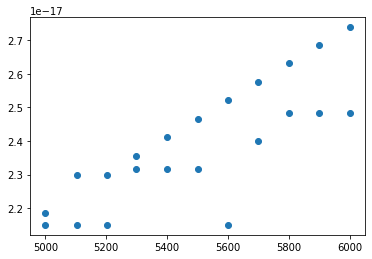

In [11]:
# STEP 9: PLOT 
# hf.Plots(B, delE_90,
#  "Delta E Vs B", 
#  "Magnetic Field (Gauss)",
#  "Energy Shift (erg)" )
plt.scatter(np.sort(B),delE_90[np.argsort(B)])


In [12]:
def DelE(B,mu_0,a):
    mu = 9.2741E-21 # erg/G
    A = 0.5
    return a*mu_0*B
p0 = [9.3E-21, 0.4]
sigma = np.random.uniform(min(delE_90), max(delE_90), len(delE_90))

In [13]:
params2, cov2 = curve_fit( DelE,
                    B,
                    delE_90,
                    p0= p0, 
                    absolute_sigma=False,
                    sigma=sigma
                    )

In [14]:
fit2 = DelE(B ,*params2)

[1.04415556e-20 4.16300811e-01]


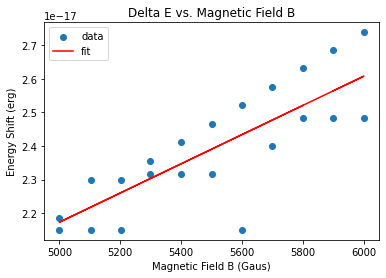

In [15]:
plt.scatter(np.sort(B),delE_90[np.argsort(B)], label = 'data')
plt.plot(B, fit2, label = 'fit', color = 'red')
print(params2)
plt.title("Delta E vs. Magnetic Field B")
plt.xlabel('Magnetic Field B (Gaus)')
plt.ylabel('Energy Shift (erg)')
plt.legend()



In [16]:
# # lists = sorted(itertools.izip(*[B,delE_90]))
# # x, y = list(itertools.izip(*lists))

# x, y = zip(*sorted(zip(B,delE_90)))
# plt.scatter(x,y)


In [17]:
hf.Chi2Values(DelE,B,delE_90,params2,sigma)

Chi-square:  0.037726443293688565
Degrees of freedom:  20
Reduced chi-square:  0.0018863221646844282
CDF:  1.5450720264678891e-24
p-test value:  1.0
